In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import scipy

In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.1.0


In [5]:
Expressions={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Neutral",5:"Sad",6:"Surprise"}

In [14]:
model_fer=tf.keras.models.load_model("C:\\Users\\pushkar\\Desktop\\kdef\\kdef_final_models\\model_dex_kd_bw(imp).h5")

In [15]:
def make_prediction(frame):
    frame=cv2.resize(frame,(200,200), interpolation = cv2.INTER_AREA)
    frame=frame/255.0
    #cv2.imwrite("frame_"+str(count)+".jpg",frame)
    frame=np.reshape(frame,(1,200,200,1))
    #print(frame.shape)
    predict_array=model_fer.predict(frame)
    #print(predict_array)
    predict=np.argmax(predict_array)
    #print(predict)
    return predict

In [16]:
def detect_face(image):
    cascPath = 'haarcascade_frontalface_default.xml'
    faceCascade = cv2.CascadeClassifier(cascPath)
  #BGR to gray conversion
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #Cascade multiscale classifier
    detected_faces = faceCascade.detectMultiScale(image, minNeighbors=6,
                                                minSize=(100,100))
    sub = gray

    for x, y, w, h in detected_faces:
        sub = gray[y:y+h,x:x+w]
    return sub,detected_faces

In [26]:
def face_in_video_real():
    cap=cv2.VideoCapture(0)
    count=0
    #cap.set(cv2.CAP_PROP_FPS,10)
    #print(cv2.CAP_PROP_FPS)
    while True:
        ret,img=cap.read()  
        sub_face,detected_faces = detect_face(img)        
        res=make_prediction(sub_face,count)
    
        #cv2.imwrite("image"+str(count)+".jpg",sub_face)
        count=count+1
        for x,y,w,h in detected_faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img,str(Expressions[res]),(x,y-5),font,0.5,(205,200,50),1,cv2.LINE_AA)
        cv2.imshow('img',img)
        if ret == False: break
        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [18]:
def face_in_video():
    emo_list=[0,0,0,0,0,0,0]
    cap=cv2.VideoCapture("mixed_emotions7.mp4")
    count=0
    #cap.set(cv2.CAP_PROP_FPS,10)
    #print(cv2.CAP_PROP_FPS)
    while True:
        ret,img=cap.read()
        if ret == False:
            break
        print('image',img.shape)
        x=img.shape[0]
        y=img.shape[1]
        y1=int(y/(x/300))
        print(y1)
        img2 = cv2.resize(img,(y1,300),interpolation = cv2.INTER_AREA)
        sub_faceog,detected_faces_og=detect_face(img)
        sub_face,detected_faces = detect_face(img2)
        if count%5==0:
            cv2.imwrite("image"+str(count)+".jpg",sub_face)
        print('face shape :',sub_face.shape)
        res=make_prediction(sub_face)
#         if count>60 and count<80:
#             cv2.imwrite("image"+str(count)+".jpg",sub_face)
        count=count+1
        for x,y,w,h in detected_faces_og:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(img,str(Expressions[res]),(x,y-5),font,0.5,(205,200,50),1,cv2.LINE_AA)
        cv2.imshow('img',img)
        emo_list[res]+=1
        if cv2.waitKey(1) & 0xFF ==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    return emo_list

In [19]:
emolist=face_in_video()

image (720, 1280, 3)
533
face shape : (132, 132)
image (720, 1280, 3)
533
face shape : (131, 131)
image (720, 1280, 3)
533
face shape : (131, 131)
image (720, 1280, 3)
533
face shape : (131, 131)
image (720, 1280, 3)
533
face shape : (131, 131)
image (720, 1280, 3)
533
face shape : (131, 131)
image (720, 1280, 3)
533
face shape : (131, 131)
image (720, 1280, 3)
533
face shape : (131, 131)
image (720, 1280, 3)
533
face shape : (131, 131)
image (720, 1280, 3)
533
face shape : (131, 131)
image (720, 1280, 3)
533
face shape : (132, 132)
image (720, 1280, 3)
533
face shape : (132, 132)
image (720, 1280, 3)
533
face shape : (131, 131)
image (720, 1280, 3)
533
face shape : (131, 131)
image (720, 1280, 3)
533
face shape : (131, 131)
image (720, 1280, 3)
533
face shape : (132, 132)
image (720, 1280, 3)
533
face shape : (132, 132)
image (720, 1280, 3)
533
face shape : (132, 132)
image (720, 1280, 3)
533
face shape : (132, 132)
image (720, 1280, 3)
533
face shape : (133, 133)
image (720, 1280, 3)

face shape : (123, 123)
image (720, 1280, 3)
533
face shape : (123, 123)
image (720, 1280, 3)
533
face shape : (125, 125)
image (720, 1280, 3)
533
face shape : (123, 123)
image (720, 1280, 3)
533
face shape : (122, 122)
image (720, 1280, 3)
533
face shape : (122, 122)
image (720, 1280, 3)
533
face shape : (124, 124)
image (720, 1280, 3)
533
face shape : (123, 123)
image (720, 1280, 3)
533
face shape : (124, 124)
image (720, 1280, 3)
533
face shape : (124, 124)
image (720, 1280, 3)
533
face shape : (123, 123)
image (720, 1280, 3)
533
face shape : (123, 123)
image (720, 1280, 3)
533
face shape : (123, 123)
image (720, 1280, 3)
533
face shape : (123, 123)
image (720, 1280, 3)
533
face shape : (122, 122)
image (720, 1280, 3)
533
face shape : (122, 122)
image (720, 1280, 3)
533
face shape : (121, 121)
image (720, 1280, 3)
533
face shape : (122, 122)
image (720, 1280, 3)
533
face shape : (120, 120)
image (720, 1280, 3)
533
face shape : (122, 122)
image (720, 1280, 3)
533
face shape : (123, 1

face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (130, 130)
image (720, 1280, 3)
533
face shape : (131, 131)
image (720, 1280, 3)
533
face shape : (130, 130)
image (720, 1280, 3)
533
face shape : (130, 130)
image (720, 1280, 3)
533
face shape : (130, 130)
image (720, 1280, 3)
533
face shape : (130, 130)
image (720, 1280, 3)
533
face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (127, 127)
image (720, 1280, 3)
533
face shape : (127, 127)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (130, 130)
image (720, 1280, 3)
533
face shape : (130, 130)
image (720, 1280, 3)
533
face shape : (130, 1

face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (130, 130)
image (720, 1280, 3)
533
face shape : (130, 130)
image (720, 1280, 3)
533
face shape : (131, 131)
image (720, 1280, 3)
533
face shape : (130, 130)
image (720, 1280, 3)
533
face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (129, 129)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (126, 126)
image (720, 1280, 3)
533
face shape : (126, 126)
image (720, 1280, 3)
533
face shape : (125, 1

face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (127, 127)
image (720, 1280, 3)
533
face shape : (127, 127)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (127, 127)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (128, 128)
image (720, 1280, 3)
533
face shape : (127, 127)
image (720, 1280, 3)
533
face shape : (126, 126)
image (720, 1280, 3)
533
face shape : (126, 126)
image (720, 1280, 3)
533
face shape : (126, 126)
image (720, 1280, 3)
533
face shape : (126, 126)
image (720, 1280, 3)
533
face shape : (125, 1

img_shape (200, 200, 3)
face (200, 200)
(1, 200, 200, 1)
5
Sad


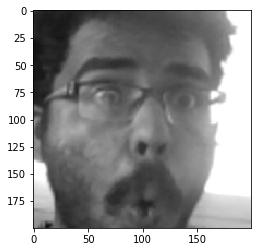

In [28]:
img = cv2.imread('frame_125.jpg',1)
print('img_shape',img.shape)
plt.imshow(img)
face,d_face = detect_face(img)
print('face',face.shape)
# cv2.imshow('dface',d_face)
index = make_prediction(face,1)
print(index)
print(Expressions[index])

In [62]:
emolist

[173, 39, 163, 54, 173, 188, 37]

In [58]:
explodeTuple = (0.1, 0.0, 0.0, 0.0, 0.0,0.0, 0.8)

In [18]:
labels_emotion='anger','disgust','fear','happy','neutral','sad','surprise'

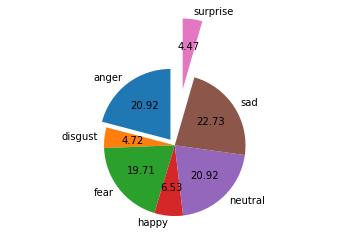

In [63]:
figureObject, axesObject = plt.subplots()
# Draw the pie chart

axesObject.pie(emolist,explode=explodeTuple,

        labels=labels_emotion,

        autopct='%1.2f',

        startangle=90)

 

# Aspect ratio - equal means pie is a circle

axesObject.axis('equal')
plt.show()